<a href="https://colab.research.google.com/github/sira-code/my_beautiful_repo/blob/master/OUTBREAK_PREDICTION_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline




In [9]:
outbreak_confirmed = pd.read_csv('outbreak_confirmed.csv')

In [10]:
outbreak_deaths = pd.read_csv('outbreak_deaths.csv')

In [11]:
outbreak_recovered = pd.read_csv('outbreak_recovered.csv')

In [12]:
outbreak_confirmed.head(15)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6034,6278,6563,6879,7134,7479,7805,8068,8371,8809,9283,9931,10649,11353,12076,12628,13228,13933,14702,15419,16214,16851,17415,18319,19268,20197,21037,22020,22794,23620,24761,25987,27373,28764,30295,31577,32785,34159,35552,37510
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3313,3392,3538,3718,3860,4044,4283,4472,4823,5041,5271,5606,5928,6302,6661,7113,7402,7774,8216,8676,8927,9282,9492,10009,10524,11221,11817,12364,13130,13325,13675,14103,14669,15281,16004,16667,17064,17489,18033,18698
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,108,108,108,108,108,108,108,108,108,108,108,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3053,3053,3059,3063,3071,3074,3075,3076,3078,3081,3082,3084,3086,3087,3090,3092,3089,3090,3092,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112,3114,3117,3117,3115,3119,3128,3131,3134,3135,3137,3143


In [13]:
outbreak_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8


In [14]:
outbreak_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64


In [15]:
cols = outbreak_confirmed.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/9/20', '6/10/20', '6/11/20', '6/12/20', '6/13/20', '6/14/20',
       '6/15/20', '6/16/20', '6/17/20', '6/18/20'],
      dtype='object', length=153)

In [16]:
confirmed = outbreak_confirmed.loc[:,cols[4]:cols[-1]]

In [17]:
deaths  = outbreak_deaths.loc[:,cols[4]:cols[-1]]

In [18]:
recoveries = outbreak_recovered.loc[:,cols[4]:cols[-1]]

In [19]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763,764,764,764,765,844,851,852,852,852,852,852,852,852,852,853,853,853,853,854,854,855
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74,81,84,86,86,86,86,86,86,88,91,92,96,113,118,130,138,140,142,148,155,166


In [20]:
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451,471,478,491,504,546
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36,36,36,37,38,39
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760,767,777,788,799,811
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,52,52,52
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6,6,6,6,7,8


In [21]:
recoveries.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,558,558,610,648,691,745,745,778,801,850,930,938,996,1040,1075,1097,1128,1138,1209,1259,1303,1328,1428,1450,1522,1585,1762,1830,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508,6158,7660
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,650,654,682,688,694,705,714,715,727,742,758,771,777,783,789,795,803,812,823,851,857,872,877,891,898,898,910,925,938,945,960,980,1001,1034,1039,1044,1055,1064,1077,1086
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2678,2841,2998,3058,3158,3271,3409,3507,3625,3746,3968,4062,4256,4426,4784,4747,4918,5129,5277,5422,5549,5748,5894,6067,6218,6297,6453,6631,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842,7943,8078
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,550,550,568,576,596,604,615,617,624,628,639,639,652,653,653,663,676,676,681,684,692,694,698,733,735,738,741,741,744,751,757,759,780,781,781,781,789,789,791,792
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13,13,13,14,14,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,21,24,24,38,38,40,41,42,61,61,64,64,64,64


In [22]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []

for i in dates:
  confirmed_sum = confirmed[i].sum()
  death_sum = deaths[i].sum()
  recovered_sum = recoveries[i].sum()
  world_cases.append(confirmed_sum)
  total_deaths.append(death_sum)
  mortality_rate.append(death_sum/confirmed_sum)
  total_recovered.append(recovered_sum)

In [23]:
confirmed_sum

8488976

In [24]:
death_sum

453981

In [25]:
recovered_sum

4155099

In [26]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79525,
 80372,
 81346,
 82704,
 84070,
 85967,
 88325,
 90262,
 92795,
 95075,
 97844,
 101761,
 105782,
 109754,
 113536,
 118375,
 125704,
 130909,
 145204,
 156283,
 167022,
 181452,
 196917,
 216161,
 243084,
 272698,
 304844,
 337597,
 378381,
 418569,
 468155,
 530138,
 594178,
 661544,
 720695,
 783580,
 858317,
 933905,
 1014713,
 1097193,
 1177447,
 1251123,
 1322598,
 1397537,
 1481490,
 1567423,
 1659674,
 1737813,
 1836615,
 1906692,
 1977287,
 2057584,
 2153578,
 2242537,
 2316073,
 2398423,
 2472264,
 2546905,
 2622750,
 2711635,
 2799064,
 2884420,
 2958352,
 3027215,
 3101078,
 3176596,
 3261450,
 3349915,
 3432050,
 3511157,
 3587874,
 3668635,
 3760836,
 3851895,
 3945002,
 4030363,
 4108270,
 4184838,
 4268247,
 4353211

In [27]:
days_since_1_22 = np.array([i for i in range (len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [28]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [29]:
world_cases

array([[    555],
       [    654],
       [    941],
       [   1434],
       [   2118],
       [   2927],
       [   5578],
       [   6166],
       [   8234],
       [   9927],
       [  12038],
       [  16787],
       [  19881],
       [  23892],
       [  27635],
       [  30794],
       [  34391],
       [  37120],
       [  40150],
       [  42762],
       [  44802],
       [  45221],
       [  60368],
       [  66885],
       [  69030],
       [  71224],
       [  73258],
       [  75136],
       [  75639],
       [  76197],
       [  76819],
       [  78572],
       [  78958],
       [  79525],
       [  80372],
       [  81346],
       [  82704],
       [  84070],
       [  85967],
       [  88325],
       [  90262],
       [  92795],
       [  95075],
       [  97844],
       [ 101761],
       [ 105782],
       [ 109754],
       [ 113536],
       [ 118375],
       [ 125704],
       [ 130909],
       [ 145204],
       [ 156283],
       [ 167022],
       [ 181452],
       [ 1

In [30]:
total_deaths

array([[    17],
       [    18],
       [    26],
       [    42],
       [    56],
       [    82],
       [   131],
       [   133],
       [   171],
       [   213],
       [   259],
       [   362],
       [   426],
       [   492],
       [   564],
       [   634],
       [   719],
       [   806],
       [   906],
       [  1013],
       [  1113],
       [  1118],
       [  1371],
       [  1523],
       [  1666],
       [  1770],
       [  1868],
       [  2007],
       [  2122],
       [  2247],
       [  2251],
       [  2458],
       [  2469],
       [  2629],
       [  2708],
       [  2770],
       [  2814],
       [  2872],
       [  2941],
       [  2996],
       [  3085],
       [  3160],
       [  3254],
       [  3347],
       [  3459],
       [  3558],
       [  3801],
       [  3987],
       [  4263],
       [  4610],
       [  4913],
       [  5411],
       [  5831],
       [  6471],
       [  7151],
       [  7957],
       [  8852],
       [  9958],
       [ 11439

In [31]:
total_recovered

array([[     28],
       [     30],
       [     36],
       [     39],
       [     52],
       [     61],
       [    107],
       [    126],
       [    143],
       [    222],
       [    284],
       [    472],
       [    623],
       [    852],
       [   1124],
       [   1487],
       [   2011],
       [   2616],
       [   3244],
       [   3946],
       [   4683],
       [   5150],
       [   6295],
       [   8058],
       [   9395],
       [  10865],
       [  12583],
       [  14352],
       [  16121],
       [  18177],
       [  18890],
       [  22886],
       [  23394],
       [  25227],
       [  27905],
       [  30384],
       [  33277],
       [  36711],
       [  39782],
       [  42716],
       [  45602],
       [  48228],
       [  51170],
       [  53796],
       [  55865],
       [  58359],
       [  60694],
       [  62493],
       [  64404],
       [  67002],
       [  68323],
       [  70250],
       [  72621],
       [  76031],
       [  78085],
       [  

In [32]:
days_in_future = 10
future_forecast = np.array([i for i in range (len(dates)+days_in_future)]).reshape(-1,1)
adjust_dates = future_forecast[:-10]

In [33]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [34]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates =[]
for i in range(len(future_forecast)):
  future_forecast_dates.append((start_date + datetime.timedelta(days=1)).strftime('%m/%d/%y'))


In [35]:
latest_confirmed = outbreak_confirmed[dates[-1]]
latest_deaths = outbreak_deaths[dates[-1]]
latest_recoveries = outbreak_recovered[dates[-1]]

In [36]:
latest_confirmed

0      27532
1       1788
2      11385
3        855
4        166
       ...  
261      688
262      909
263      210
264     5279
265        4
Name: 6/18/20, Length: 266, dtype: int64

In [37]:
latest_deaths

0      546
1       39
2      811
3       52
4        8
      ... 
261     12
262    248
263      5
264     51
265      0
Name: 6/18/20, Length: 266, dtype: int64

In [38]:
latest_recoveries

0      7660
1      1086
2      8078
3       792
4        64
       ... 
248     191
249     273
250     129
251    3762
252       2
Name: 6/18/20, Length: 253, dtype: int64

In [39]:
unique_countries = list(outbreak_confirmed['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Diamond Princess',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq'

In [40]:
country_outbreak_confirmed = []
no_cases = []
for i in unique_countries:
  cases = latest_confirmed[outbreak_confirmed['Country/Region']==i].sum()
  if cases > 0:
    country_outbreak_confirmed.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
   unique_countries.remove(i)

unique_countries = [k for k,v in sorted(zip(unique_countries,country_outbreak_confirmed),key=operator.itemgetter(1),reverse=True)]
for i in range (len(unique_countries)):
  country_outbreak_confirmed[i]=latest_confirmed[outbreak_confirmed['Country/Region']==unique_countries[i]].sum()

In [41]:
print('Outbreak Confirmed by Countries/Region:')
for i in range(len(unique_countries)):
  print(f'{unique_countries[i]}:{country_outbreak_confirmed[i]} cases')


Outbreak Confirmed by Countries/Region:
US:2191052 cases
Brazil:978142 cases
Russia:560321 cases
India:380532 cases
United Kingdom:301935 cases
Spain:245268 cases
Peru:244388 cases
Italy:238159 cases
Chile:225103 cases
Iran:197647 cases
France:195272 cases
Germany:189817 cases
Turkey:184031 cases
Mexico:165455 cases
Pakistan:165062 cases
Saudi Arabia:145991 cases
Bangladesh:102292 cases
Canada:101877 cases
China:84494 cases
Qatar:84441 cases
South Africa:83890 cases
Belgium:60348 cases
Colombia:57202 cases
Belarus:56657 cases
Sweden:56043 cases
Egypt:50437 cases
Netherlands:49527 cases
Ecuador:49097 cases
United Arab Emirates:43752 cases
Indonesia:42762 cases
Singapore:41473 cases
Portugal:38089 cases
Kuwait:38074 cases
Argentina:37510 cases
Ukraine:34833 cases
Switzerland:31200 cases
Poland:31015 cases
Philippines:27799 cases
Afghanistan:27532 cases
Oman:26818 cases
Iraq:25717 cases
Ireland:25355 cases
Dominican Republic:24645 cases
Panama:23351 cases
Romania:23080 cases
Bolivia:21499

In [42]:
unique_provinces = list(outbreak_confirmed['Province/State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Alberta',
 'British Columbia',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Anhui',
 'Beijing',
 'Chongqing',
 'Fujian',
 'Gansu',
 'Guangdong',
 'Guangxi',
 'Guizhou',
 'Hainan',
 'Hebei',
 'Heilongjiang',
 'Henan',
 'Hong Kong',
 'Hubei',
 'Hunan',
 'Inner Mongolia',
 'Jiangsu',
 'Jiangxi',
 'Jilin',
 'Liaoning',
 'Macau',
 'Ningxia',
 'Qinghai',
 'Shaanxi',
 'Shandong',
 'Shanghai',
 'Shanxi',
 'Sichuan',
 'Tianjin',
 'Tibet',
 'Xinjiang',
 'Yunnan',
 'Zhejiang',
 'Faroe Islands',
 'Greenland',
 'French Guiana',
 'French Polynesia',
 'Guadeloupe',
 'Mayotte',
 'New Caledonia',
 'Reunion',
 'Saint Barthelemy',
 'St Martin',
 'Martinique',
 'Aruba',
 'Curacao',
 'Sint Maarten',
 'Bermuda',
 'Cayman Island

In [43]:
unique_provinces = list(outbreak_confirmed['Province/State'].unique())
outliers=['South Australia','Hong Kong']
for i in outliers:
     unique_provinces.remove(i)


In [44]:
province_outbreak_confirmed = []
no_cases =[]
for i in unique_provinces:
  cases = latest_confirmed[outbreak_confirmed['Province/State']==i].sum()
  if cases > 0:
    province_outbreak_confirmed.append(cases)
  else:
    no_cases.append(i)

for i in no_cases:
   unique_provinces.remove(i)


In [45]:
for i in range(len(unique_provinces)):
  print(f'{unique_provinces[i]}:{province_outbreak_confirmed[i]} cases')

Australian Capital Territory:108 cases
New South Wales:3143 cases
Northern Territory:29 cases
Queensland:1066 cases
Tasmania:228 cases
Victoria:1792 cases
Western Australia:603 cases
Alberta:7579 cases
British Columbia:2783 cases
Grand Princess:13 cases
Manitoba:308 cases
New Brunswick:164 cases
Newfoundland and Labrador:261 cases
Nova Scotia:1061 cases
Ontario:34574 cases
Prince Edward Island:27 cases
Quebec:54383 cases
Saskatchewan:708 cases
Anhui:991 cases
Beijing:777 cases
Chongqing:582 cases
Fujian:362 cases
Gansu:151 cases
Guangdong:1631 cases
Guangxi:254 cases
Guizhou:147 cases
Hainan:171 cases
Hebei:340 cases
Heilongjiang:947 cases
Henan:1276 cases
Hubei:68135 cases
Hunan:1019 cases
Inner Mongolia:238 cases
Jiangsu:653 cases
Jiangxi:932 cases
Jilin:155 cases
Liaoning:153 cases
Macau:45 cases
Ningxia:75 cases
Qinghai:18 cases
Shaanxi:314 cases
Shandong:792 cases
Shanghai:697 cases
Shanxi:198 cases
Sichuan:589 cases
Tianjin:197 cases
Tibet:1 cases
Xinjiang:76 cases
Yunnan:185 cas

In [46]:
nan_indices = []

for i in range (len(unique_provinces)):
  if type (unique_provinces[i])== float:
    nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_outbreak_confirmed = list(province_outbreak_confirmed)

for i in nan_indices:
  unique_provinces.pop(i)
  province_outbreak_confirmed.pop(i)


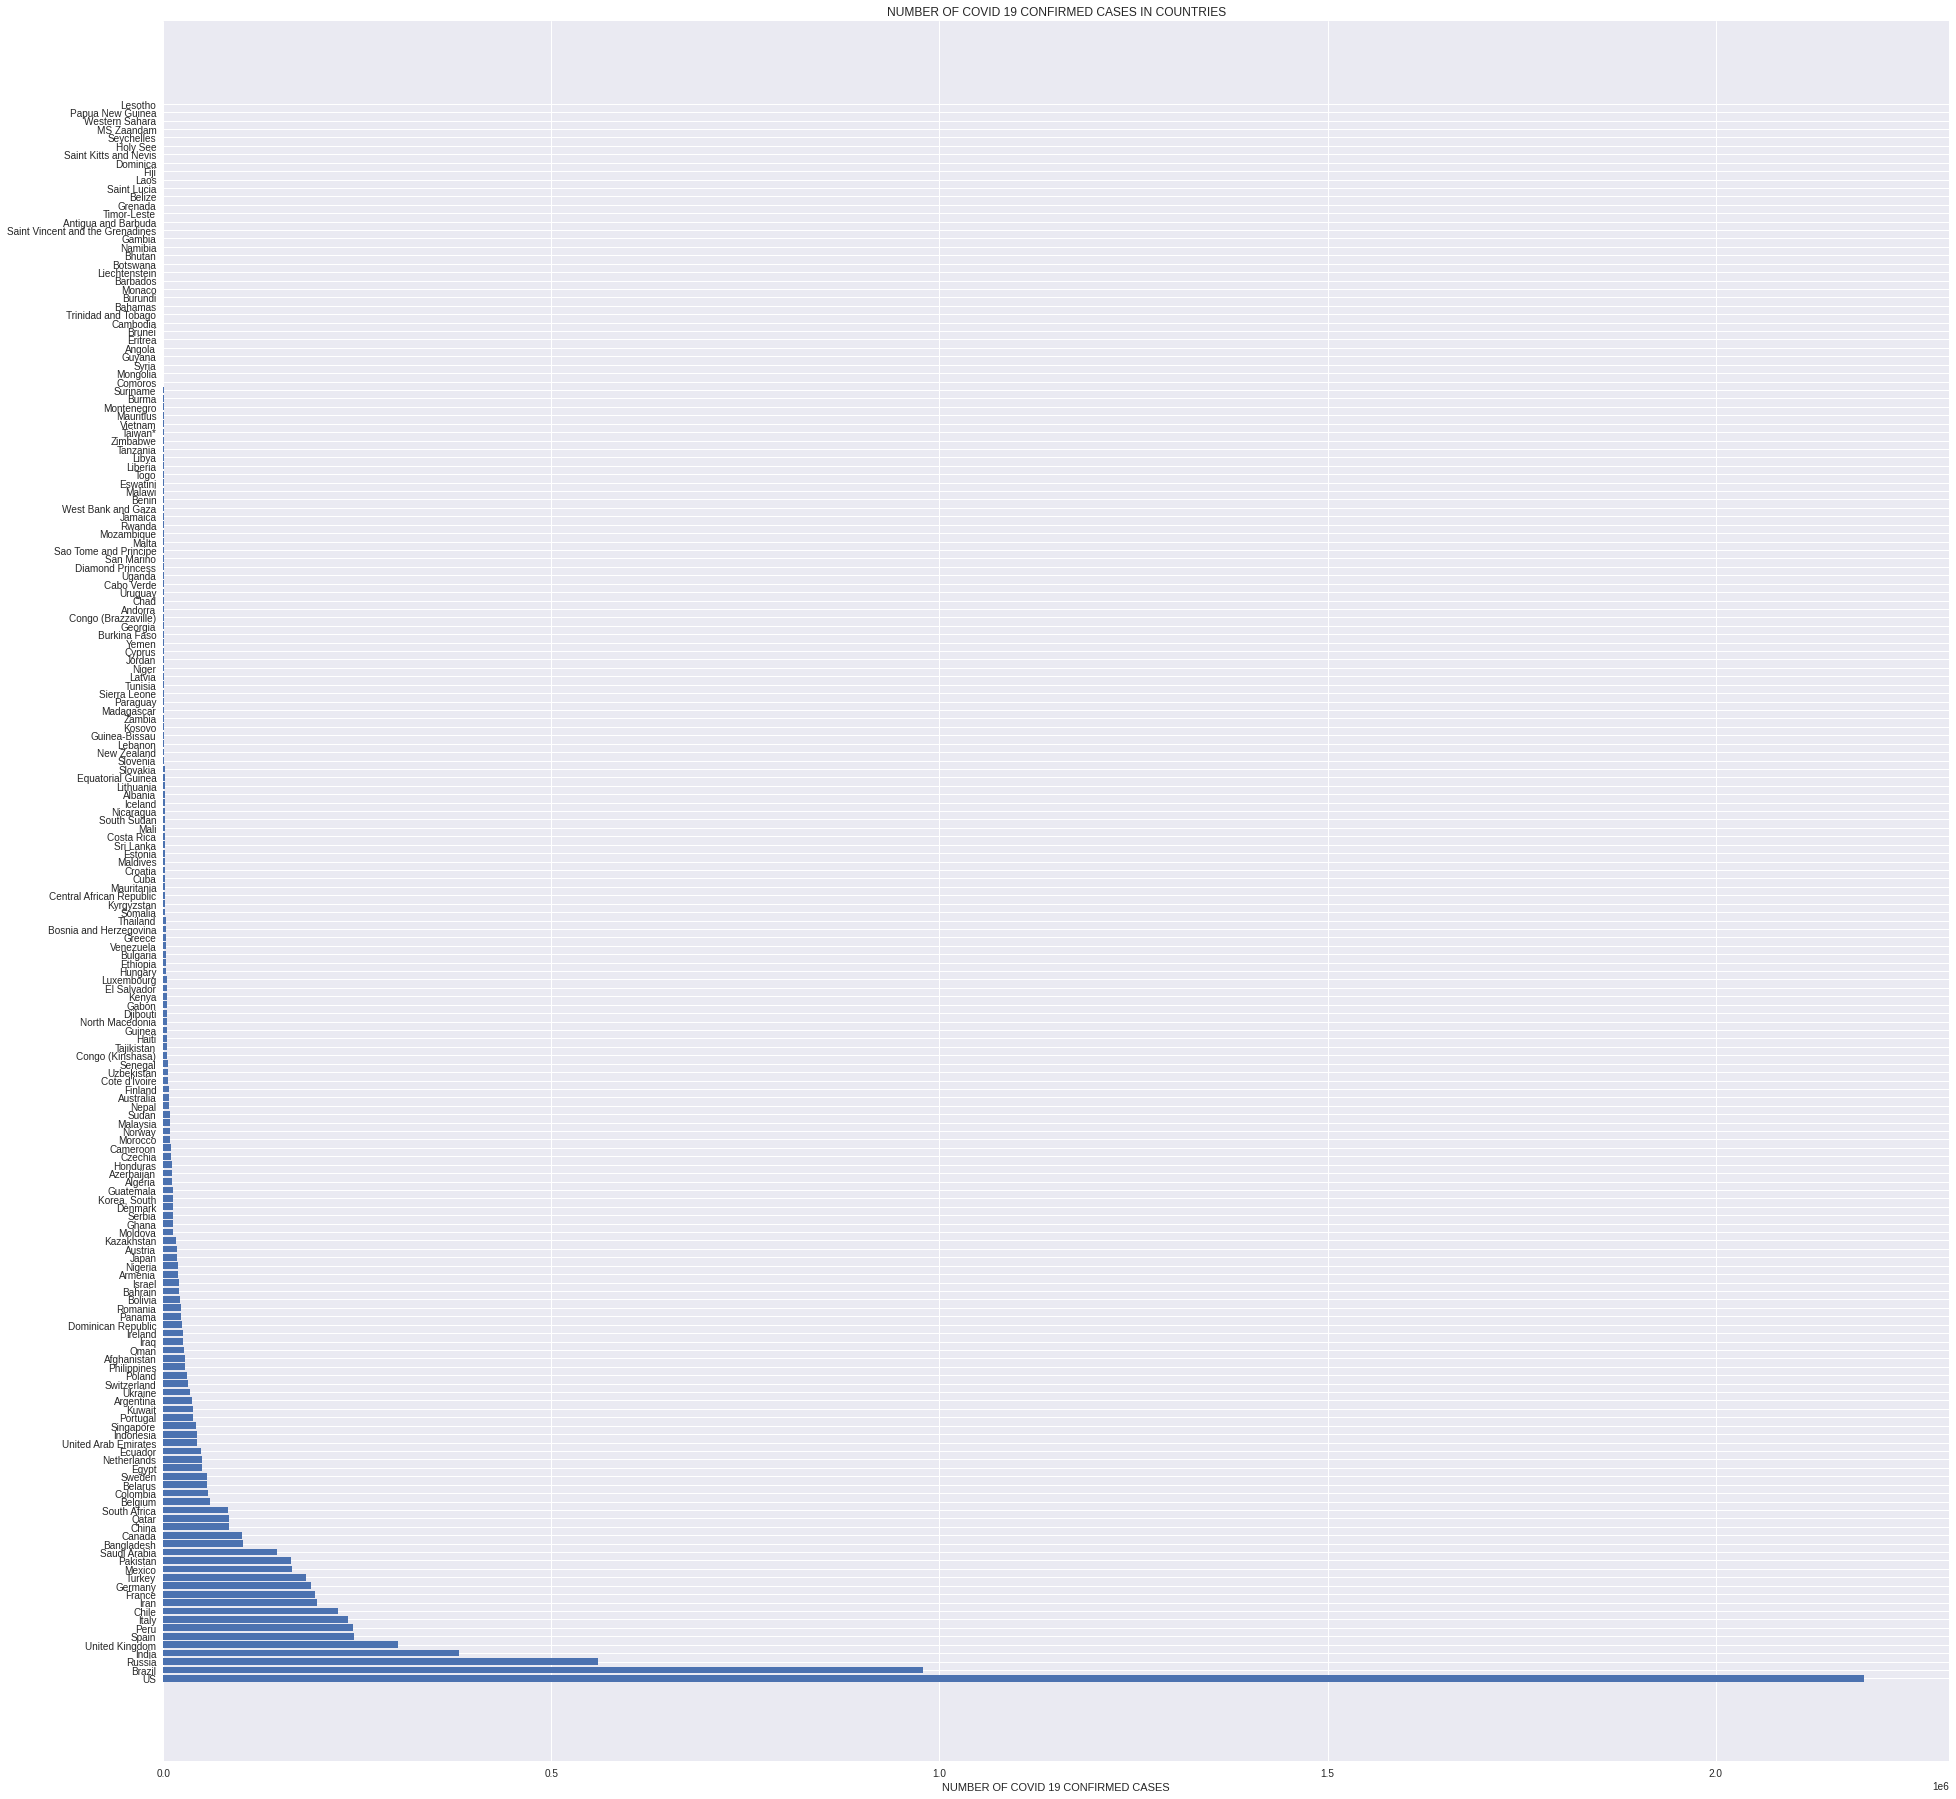

In [47]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_outbreak_confirmed)
plt.xlabel('NUMBER OF COVID 19 CONFIRMED CASES')
plt.title('NUMBER OF COVID 19 CONFIRMED CASES IN COUNTRIES')
plt.show()

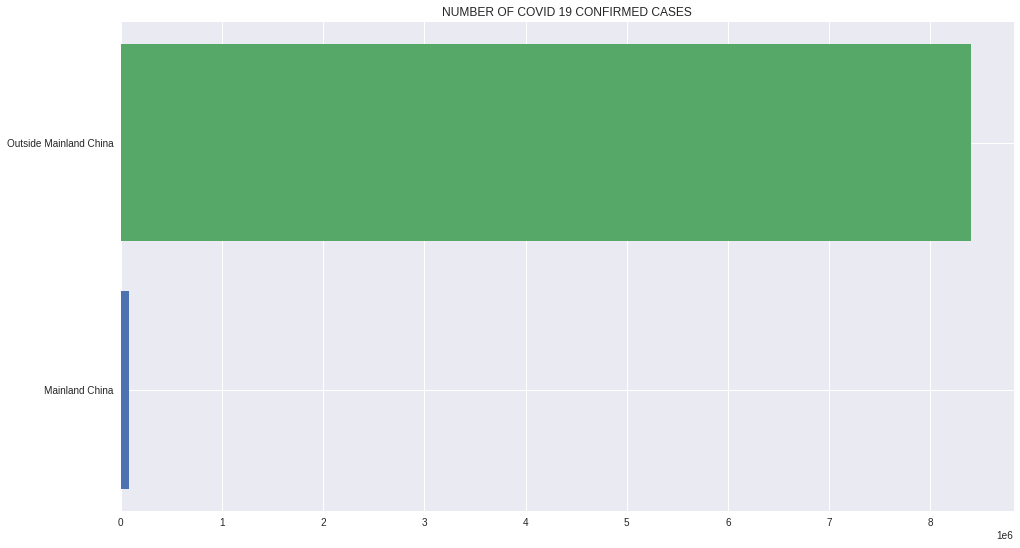

In [48]:
china_confirmed = latest_confirmed[outbreak_confirmed['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_outbreak_confirmed)- china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China',china_confirmed)
plt.barh('Outside Mainland China',outside_mainland_china_confirmed)

plt.title('NUMBER OF COVID 19 CONFIRMED CASES')
plt.show()



In [49]:
print('Outside Mainland China {} cases'.format(outside_mainland_china_confirmed))
print(' Mainland China {} cases'.format(china_confirmed))
print('Total {} cases'.format(china_confirmed+outside_mainland_china_confirmed))

Outside Mainland China 8404482 cases
 Mainland China 84494 cases
Total 8488976 cases


In [50]:
visual_unique_countries = []
visual_outbreak_confirmed = []
others = np.sum(country_outbreak_confirmed[10:])
for i in range (len(country_outbreak_confirmed[10:])):
  visual_unique_countries.append(unique_countries[i])
  visual_outbreak_confirmed.append(country_outbreak_confirmed[i])

visual_unique_countries.append('Others')
visual_outbreak_confirmed.append(others)

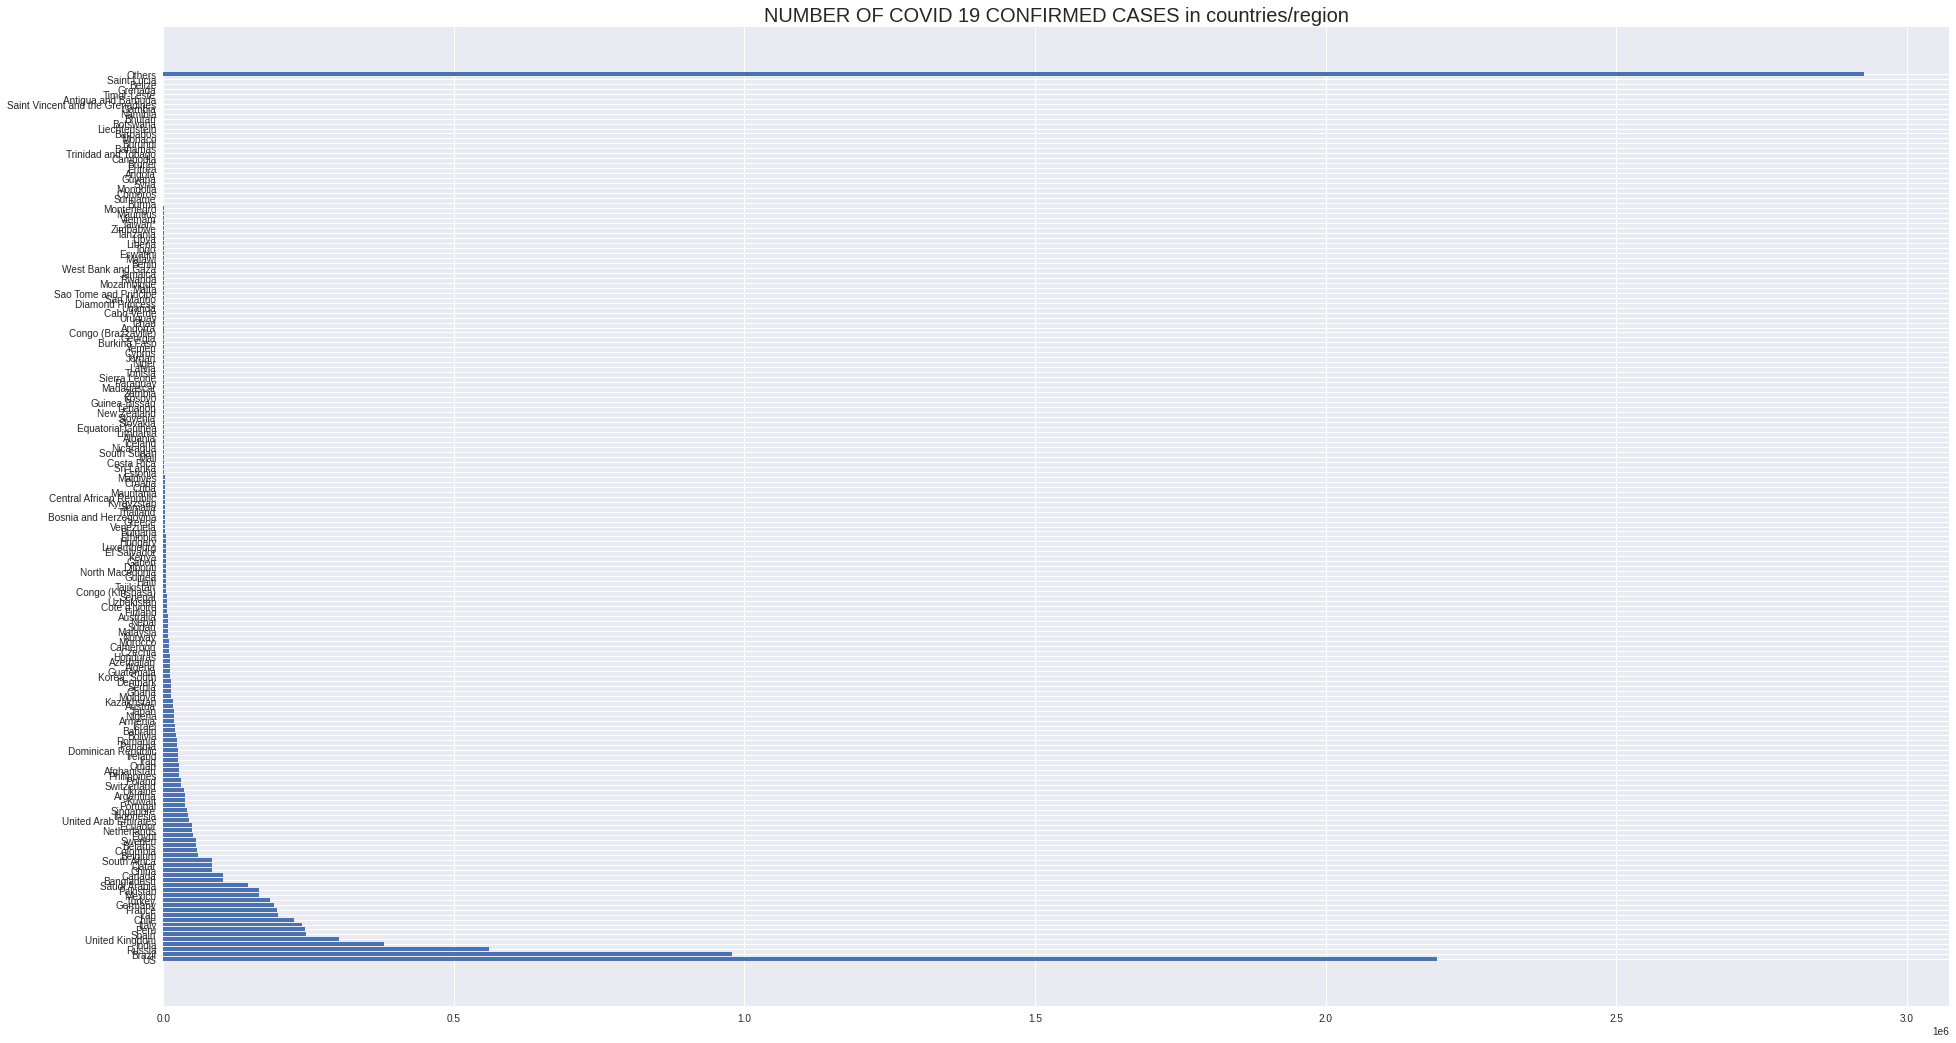

In [51]:
plt.figure(figsize=(32,18))
plt.barh(visual_unique_countries,visual_outbreak_confirmed)
plt.title('NUMBER OF COVID 19 CONFIRMED CASES in countries/region', size = 20)
plt.show()

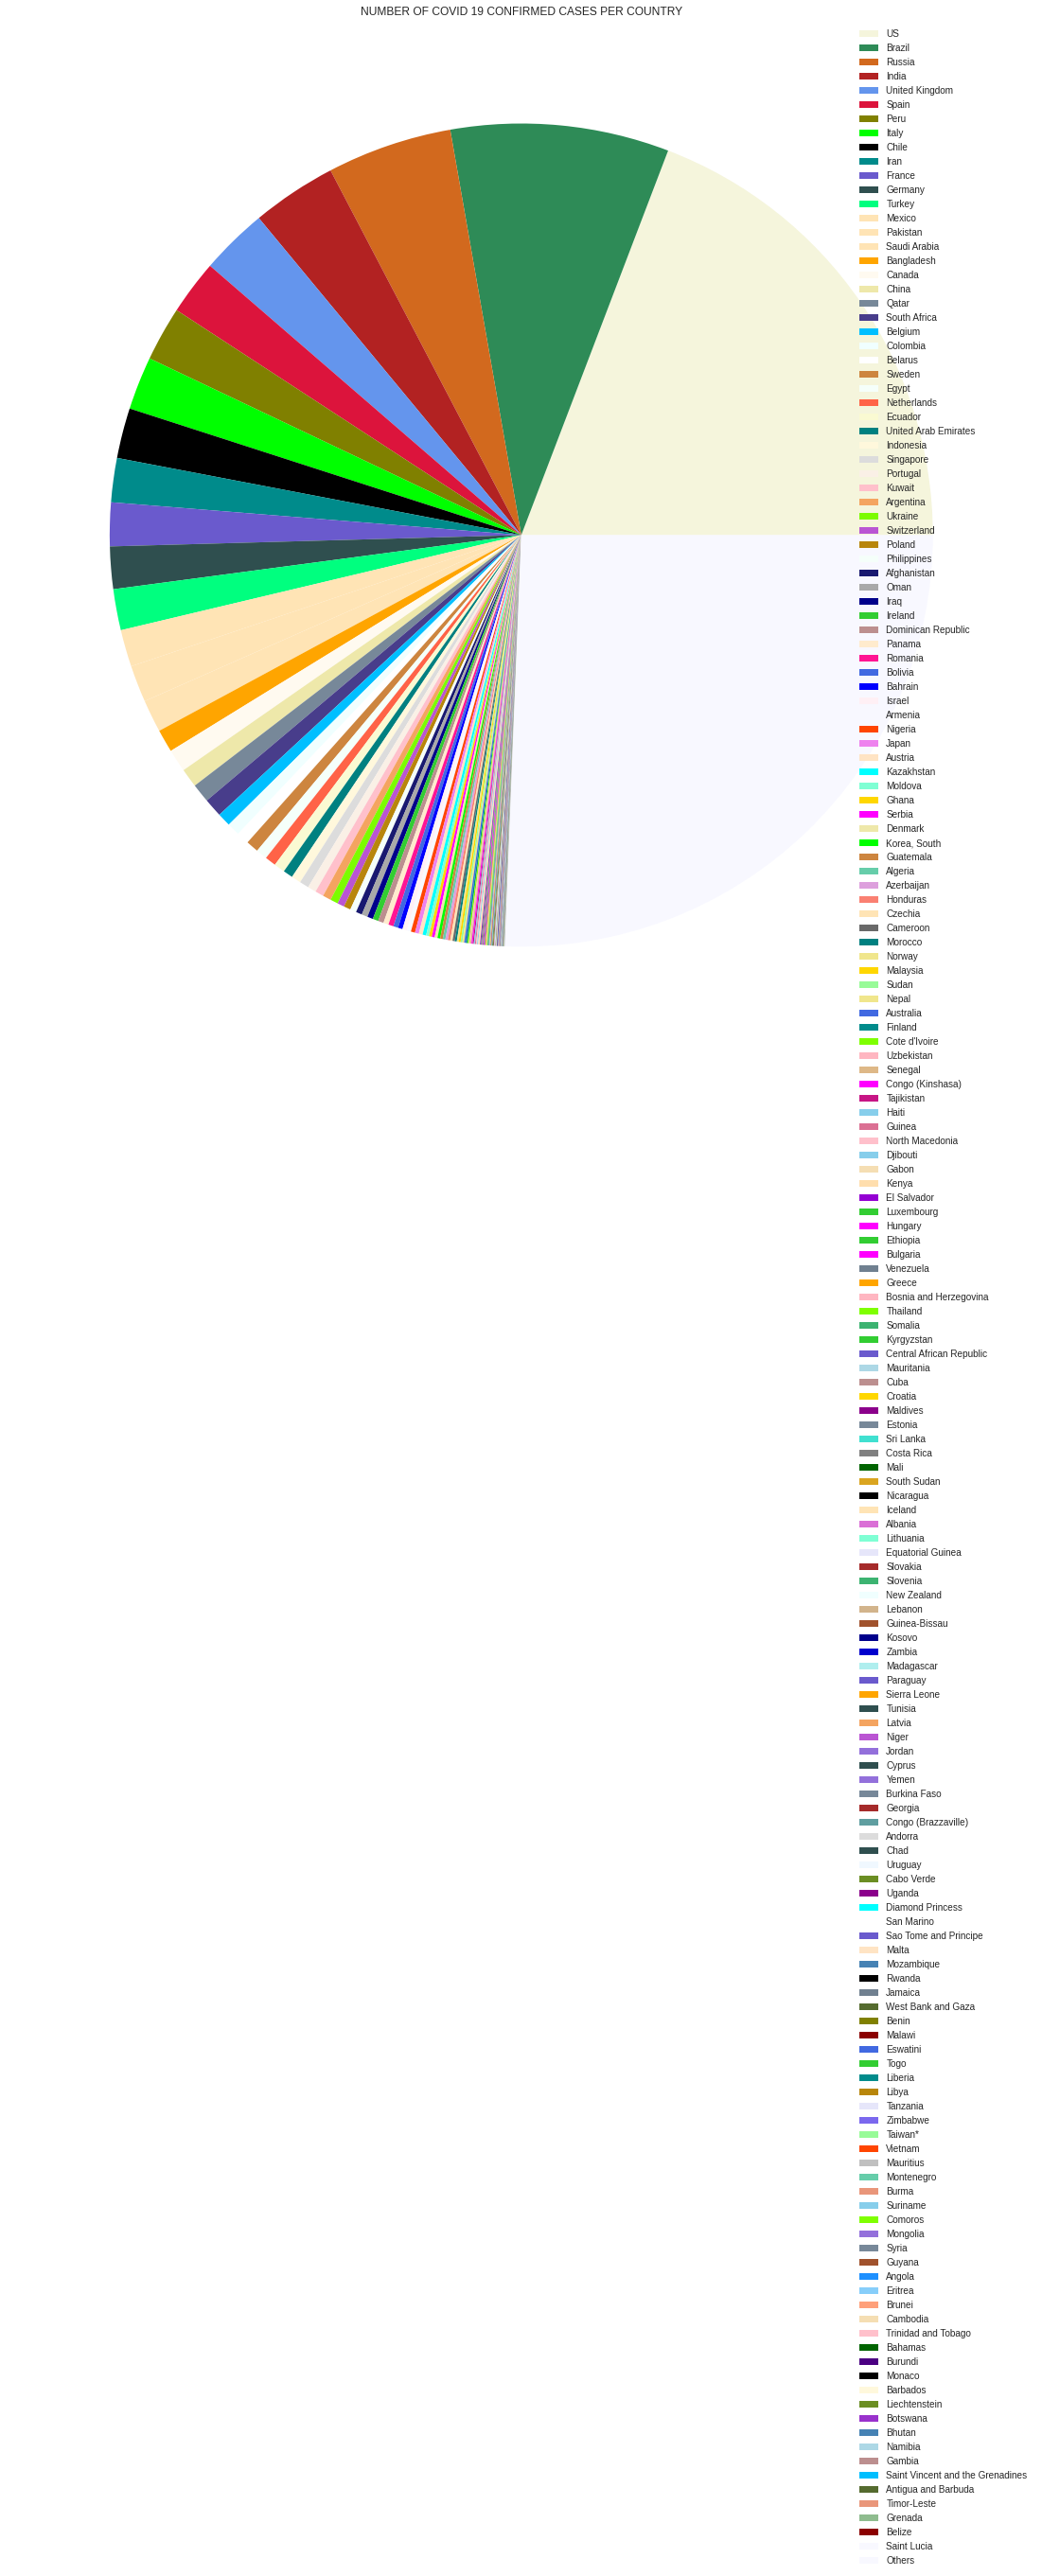

In [52]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('NUMBER OF COVID 19 CONFIRMED CASES PER COUNTRY')
plt.pie(visual_outbreak_confirmed, colors=c)
plt.legend(visual_unique_countries, loc='best')


plt.show()

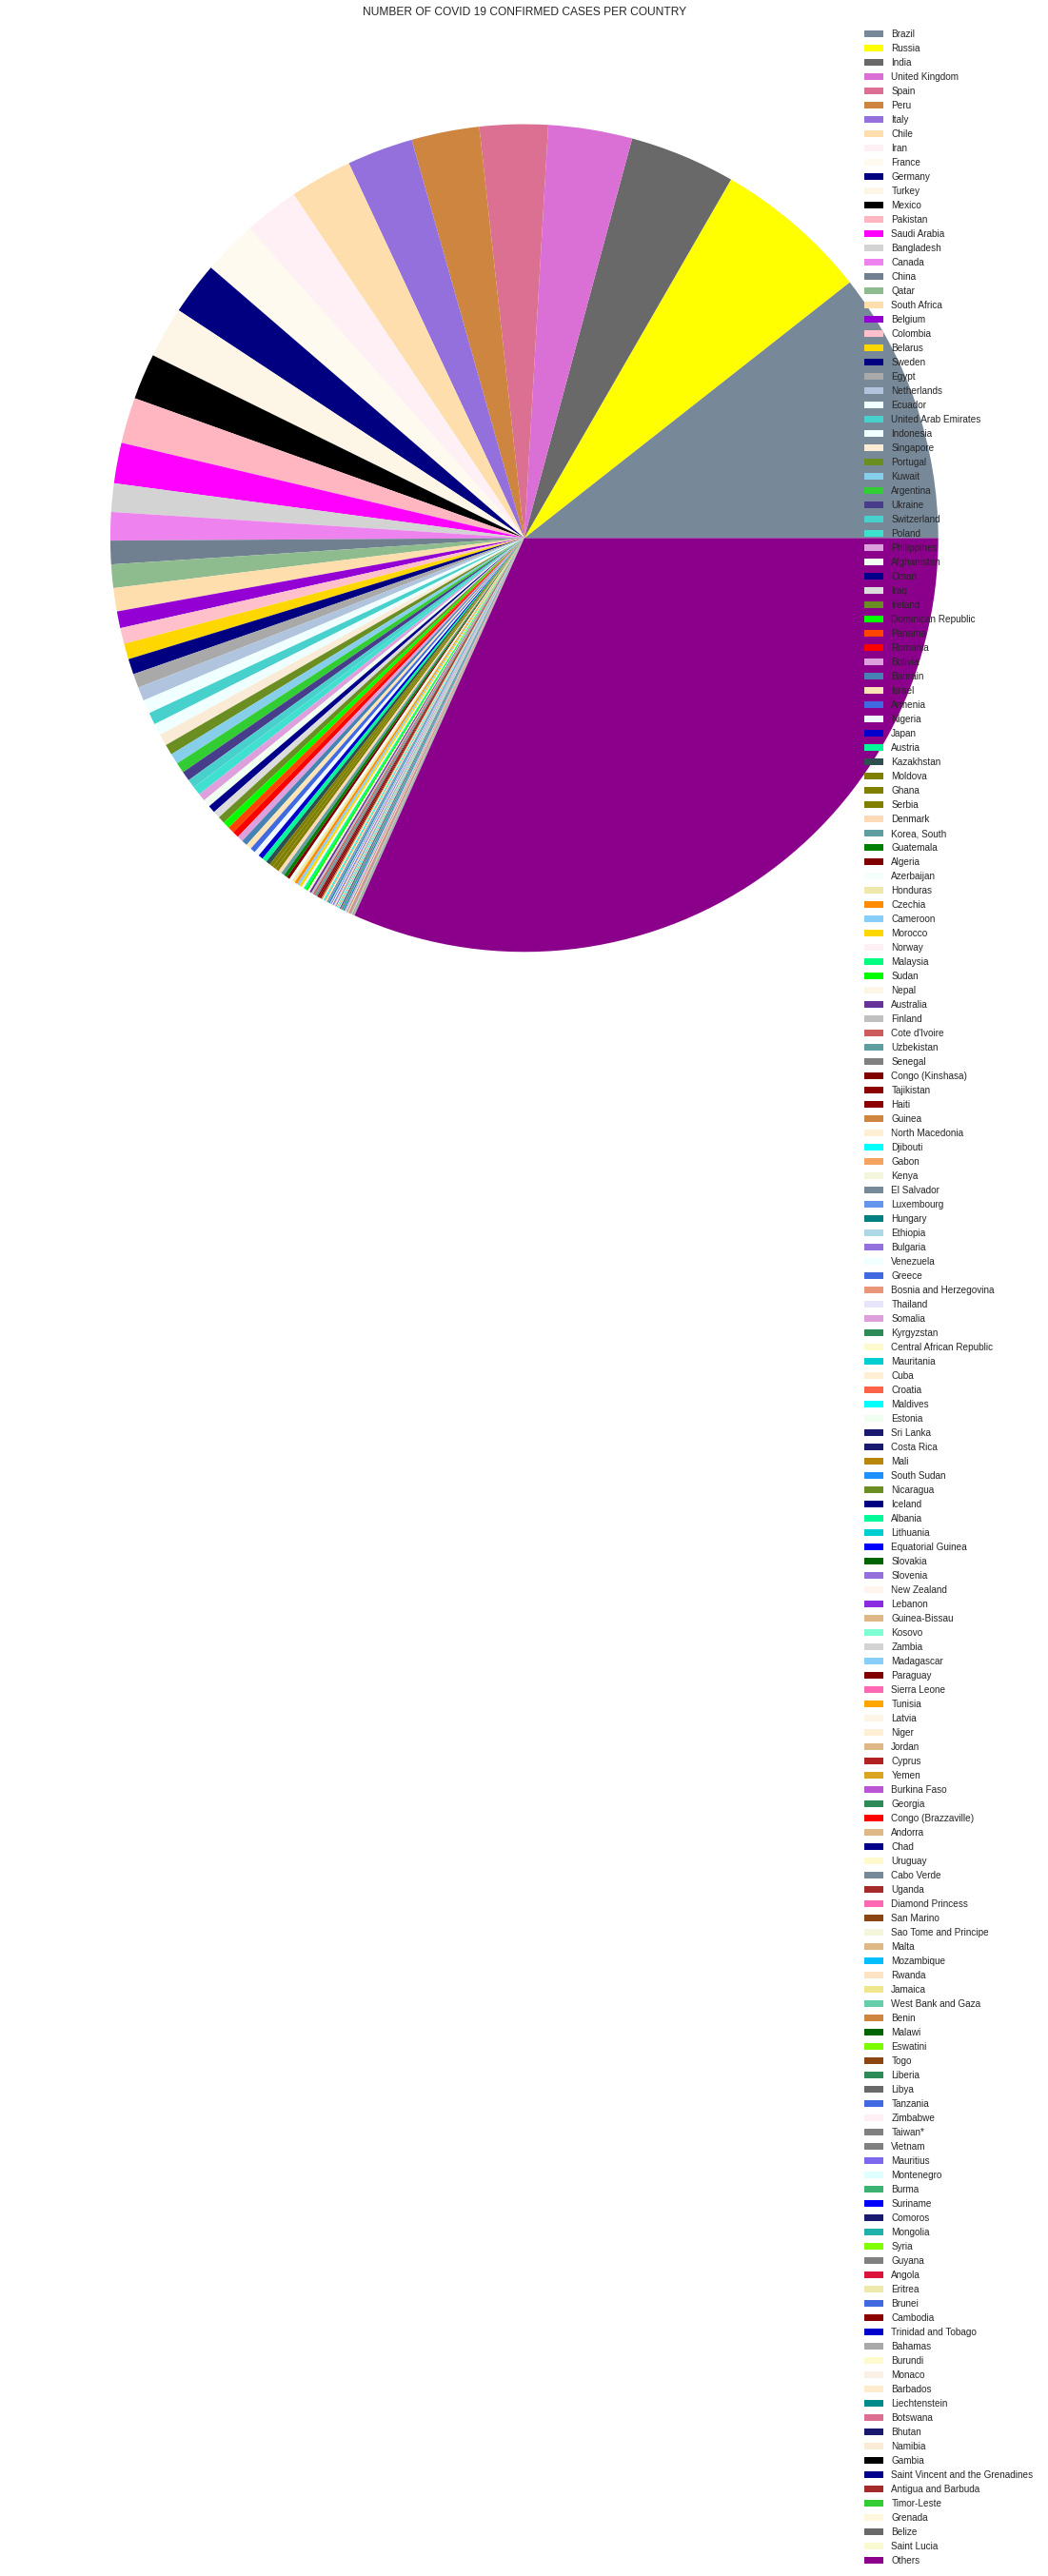

In [53]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('NUMBER OF COVID 19 CONFIRMED CASES PER COUNTRY')
plt.pie(visual_outbreak_confirmed[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')


plt.show()

In [54]:
kernel = ['poly','sigmoid','rbf']
c = [0.01,0.1,1 , 10]
gamma = [0.01,0.1,1 ]
epsilon = [0.01,0.1,1 ]
shrinking = [True , False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search=RandomizedSearchCV(svm, svm_grid, scoring="neg_mean_squared_error", cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
x_train_confirmed,x_test_confirmed,y_train_confirmed,y_test_confirmed = train_test_split(days_since_1_22,world_cases,test_size = 0.15,shuffle=False)
svm_search.fit(x_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.5min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [55]:
svm_search.best_params_

{'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'poly', 'shrinking': False}

In [56]:
svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forecast)

In [57]:
svm_confirmed

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.1,
    kernel='poly', max_iter=-1, shrinking=False, tol=0.001, verbose=False)

In [58]:
svm_pred

array([9.16049912e+02, 9.19169641e+02, 9.41007742e+02, 1.00028259e+03,
       1.11571255e+03, 1.30601600e+03, 1.58991132e+03, 1.98611687e+03,
       2.51335102e+03, 3.19033216e+03, 4.03577865e+03, 5.06840886e+03,
       6.30694117e+03, 7.77009394e+03, 9.47658556e+03, 1.14451344e+04,
       1.36944588e+04, 1.62432772e+04, 1.91103079e+04, 2.23142693e+04,
       2.58738798e+04, 2.98078577e+04, 3.41349215e+04, 3.88737894e+04,
       4.40431799e+04, 4.96618114e+04, 5.57484022e+04, 6.23216706e+04,
       6.94003351e+04, 7.70031140e+04, 8.51487258e+04, 9.38558887e+04,
       1.03143321e+05, 1.13029741e+05, 1.23533868e+05, 1.34674419e+05,
       1.46470114e+05, 1.58939670e+05, 1.72101805e+05, 1.85975239e+05,
       2.00578689e+05, 2.15930874e+05, 2.32050512e+05, 2.48956322e+05,
       2.66667022e+05, 2.85201331e+05, 3.04577966e+05, 3.24815646e+05,
       3.45933090e+05, 3.67949016e+05, 3.90882142e+05, 4.14751186e+05,
       4.39574868e+05, 4.65371905e+05, 4.92161015e+05, 5.19960918e+05,
      

MAE 1041445.1961313494
MSE 1199174216315.5227


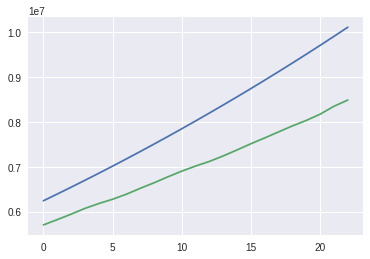

In [59]:
svm_test_pred = svm_confirmed.predict(x_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('MAE' , mean_absolute_error(svm_test_pred,y_test_confirmed))
print('MSE' , mean_squared_error(svm_test_pred,y_test_confirmed))


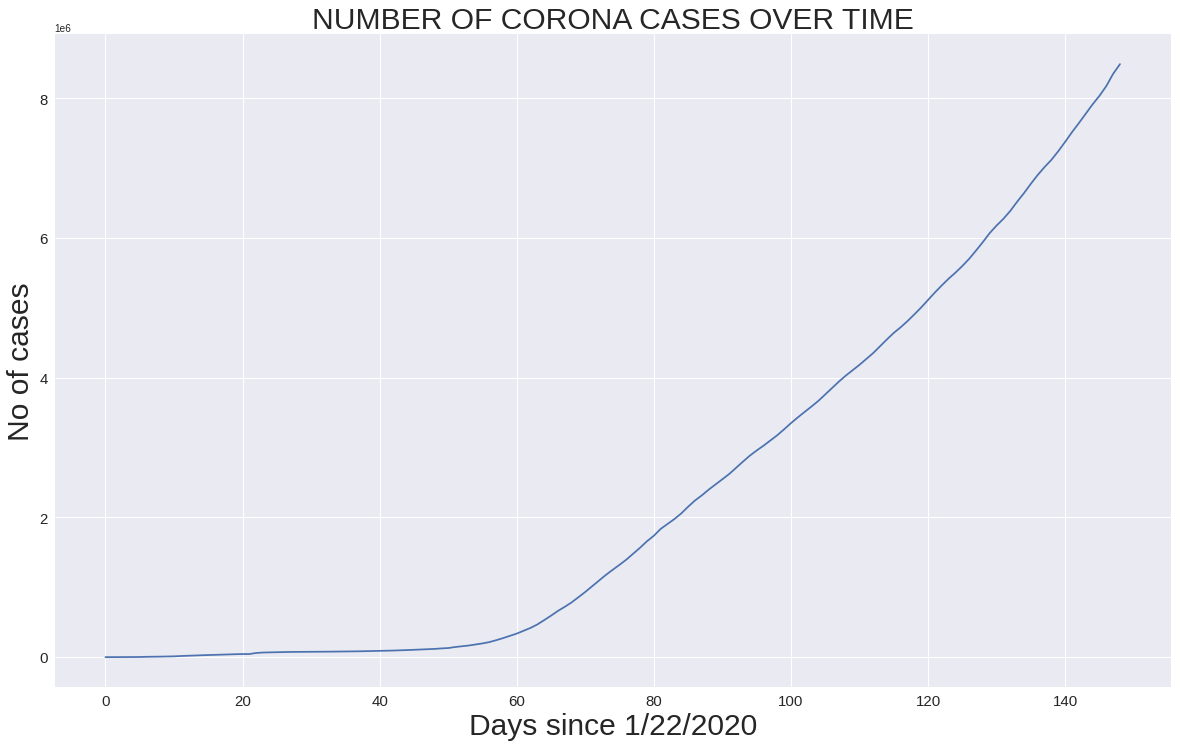

In [60]:

plt.figure(figsize=(20,12))
plt.plot(adjust_dates, world_cases)
plt.title('NUMBER OF CORONA CASES OVER TIME', size = 30)
plt.xlabel('Days since 1/22/2020', size = 30)
plt.ylabel('No of cases', size = 30)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

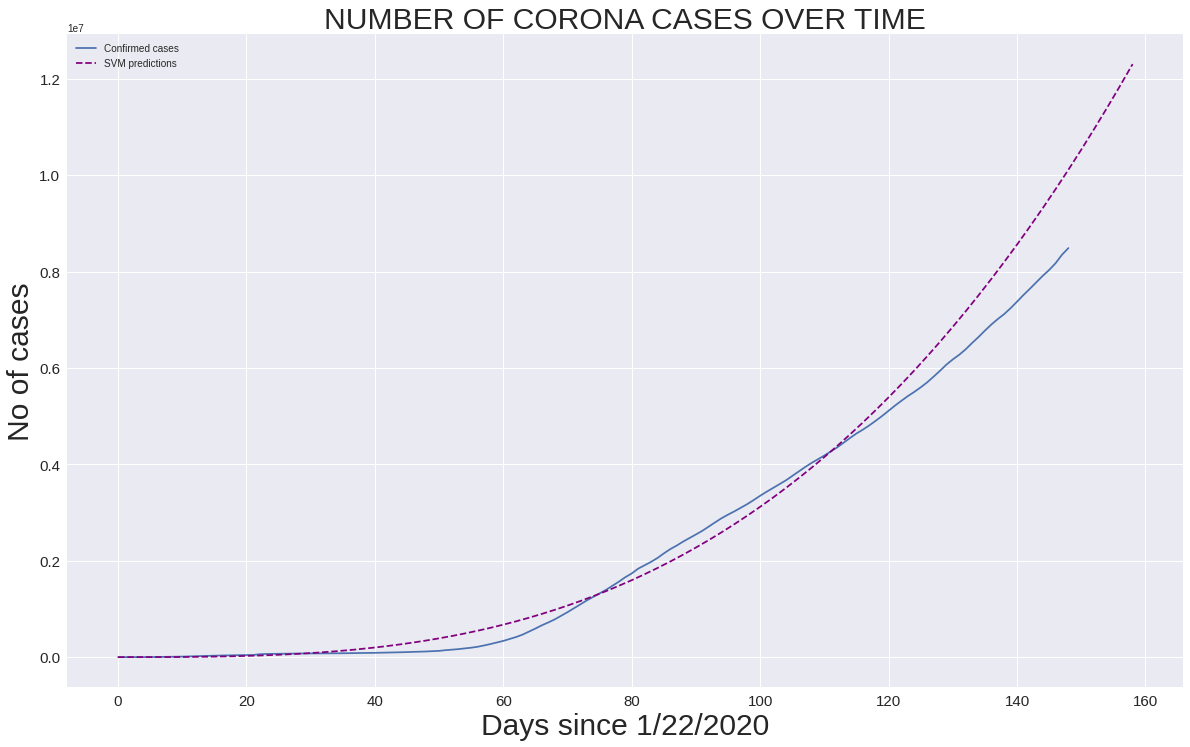

In [61]:
plt.figure(figsize=(20,12))
plt.plot(adjust_dates, world_cases)
plt.plot(future_forecast, svm_pred,linestyle='dashed', color = 'purple')
plt.title('NUMBER OF CORONA CASES OVER TIME', size = 30)
plt.xlabel('Days since 1/22/2020', size = 30)
plt.ylabel('No of cases', size = 30)
plt.legend(['Confirmed cases' ,'SVM predictions'])

plt.xticks(size =15)
plt.yticks(size =15)
plt.show()


In [62]:
print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('01/23/20', 10320819.598320853),
 ('01/23/20', 10530000.529648673),
 ('01/23/20', 10741989.217163932),
 ('01/23/20', 10956804.37846459),
 ('01/23/20', 11174464.732376944),
 ('01/23/20', 11394988.997818839),
 ('01/23/20', 11618395.89207543),
 ('01/23/20', 11844704.13440026),
 ('01/23/20', 12073932.44235314),
 ('01/23/20', 12306099.53535546)}

In [63]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize=True ,fit_intercept=True)
linear_model.fit(x_train_confirmed,y_train_confirmed)
test_linear_pred = linear_model.predict(x_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
print('MAE' , mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MSE' , mean_squared_error(test_linear_pred,y_test_confirmed))


MAE 2235987.115849431
MSE 5287207967769.846


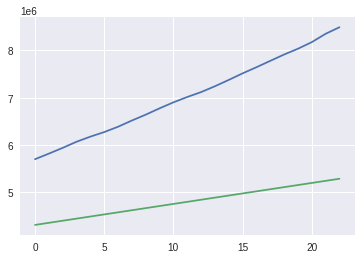

In [64]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

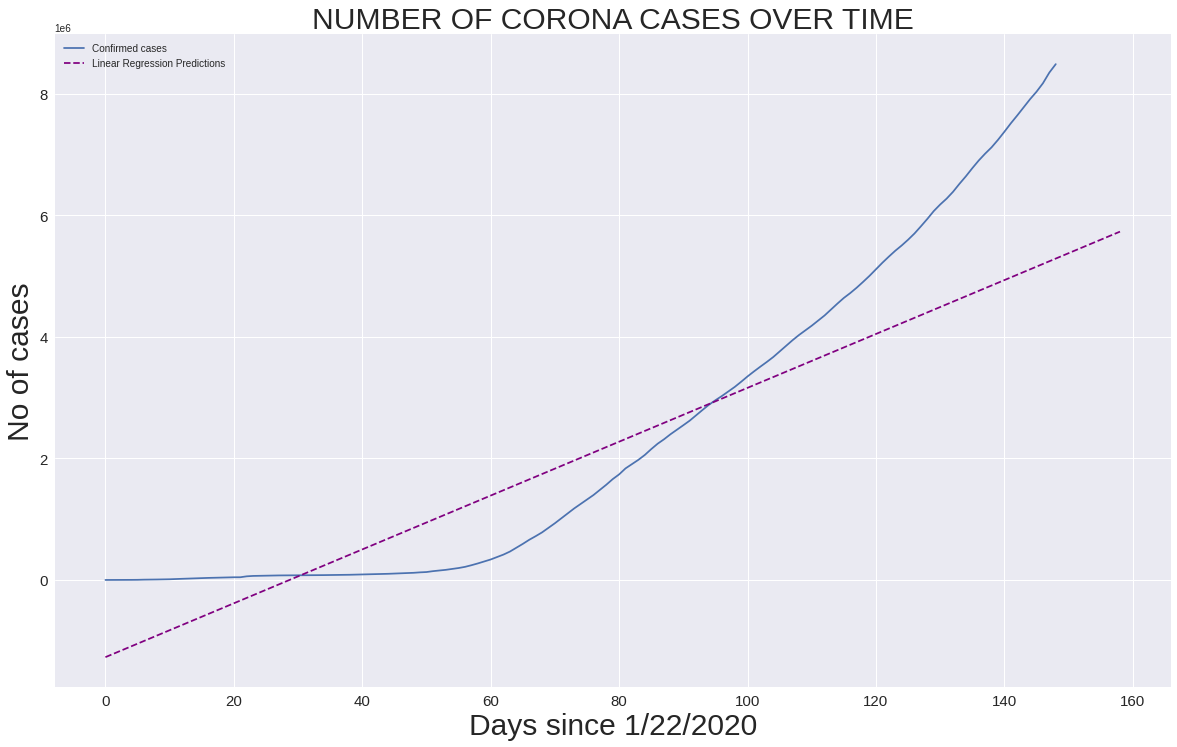

In [65]:
plt.figure(figsize=(20,12))
plt.plot(adjust_dates, world_cases)
plt.plot(future_forecast,linear_pred ,linestyle='dashed', color = 'purple')
plt.title('NUMBER OF CORONA CASES OVER TIME', size = 30)
plt.xlabel('Days since 1/22/2020', size = 30)
plt.ylabel('No of cases', size = 30)
plt.legend(['Confirmed cases' ,'Linear Regression Predictions'])

plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

In [66]:
print('Linear regression future predictions:')
print(linear_pred[-10:])

Linear regression future predictions:
[[5333637.68815898]
 [5377955.43269591]
 [5422273.17723285]
 [5466590.92176978]
 [5510908.66630671]
 [5555226.41084365]
 [5599544.15538058]
 [5643861.89991751]
 [5688179.64445444]
 [5732497.38899138]]


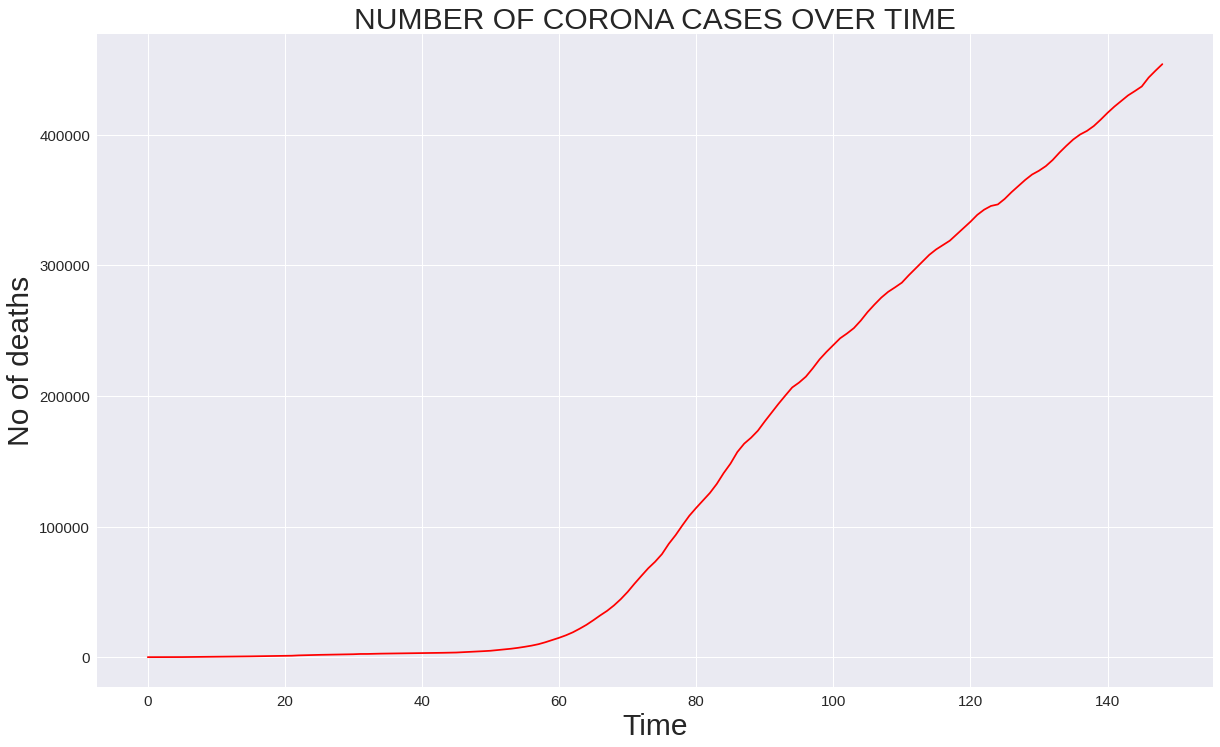

In [67]:
plt.figure(figsize=(20,12))
plt.plot(adjust_dates, total_deaths, color = 'red')
plt.title('NUMBER OF CORONA CASES OVER TIME', size = 30)
plt.xlabel('Time', size = 30)
plt.ylabel('No of deaths', size = 30)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

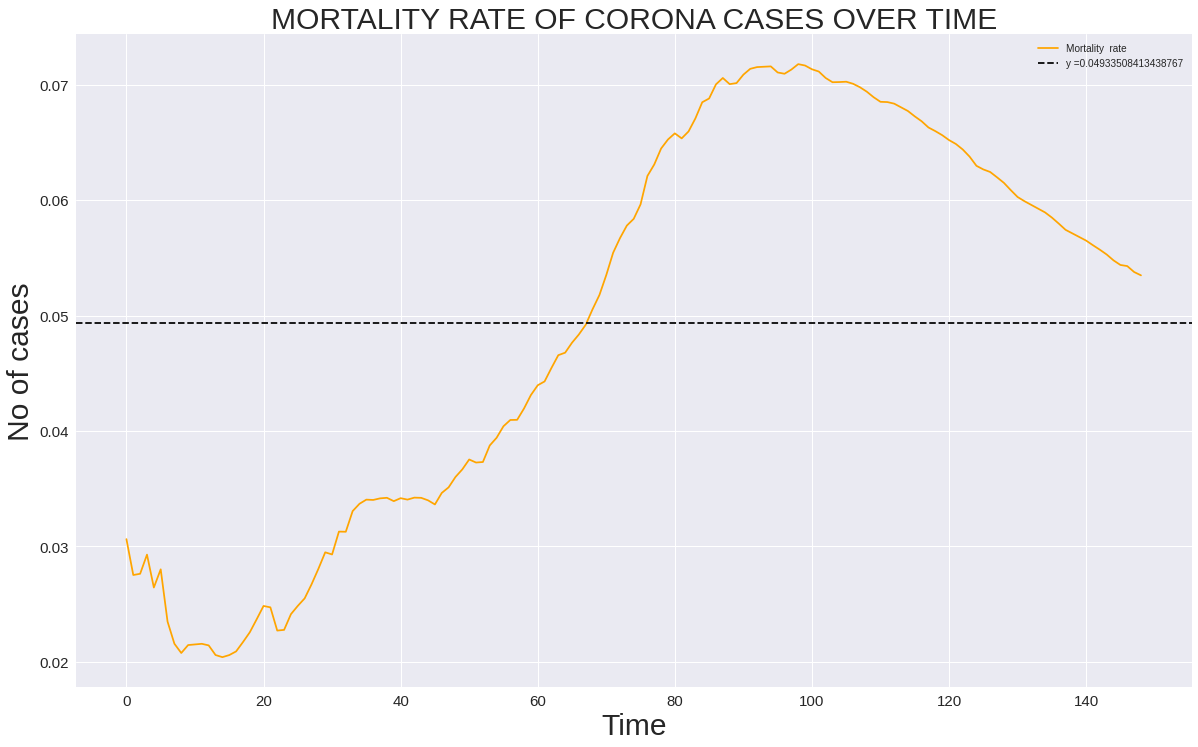

In [68]:
mean_mortality_rate =np.mean(mortality_rate)
plt.figure(figsize=(20,12))
plt.plot(adjust_dates,mortality_rate, color = 'orange')
plt.axhline(y = mean_mortality_rate ,linestyle='--', color = 'black')
plt.title('MORTALITY RATE OF CORONA CASES OVER TIME', size = 30)
plt.xlabel('Time', size = 30)
plt.ylabel('No of cases', size = 30)
plt.legend(['Mortality  rate' ,'y ='+str( mean_mortality_rate)])

plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

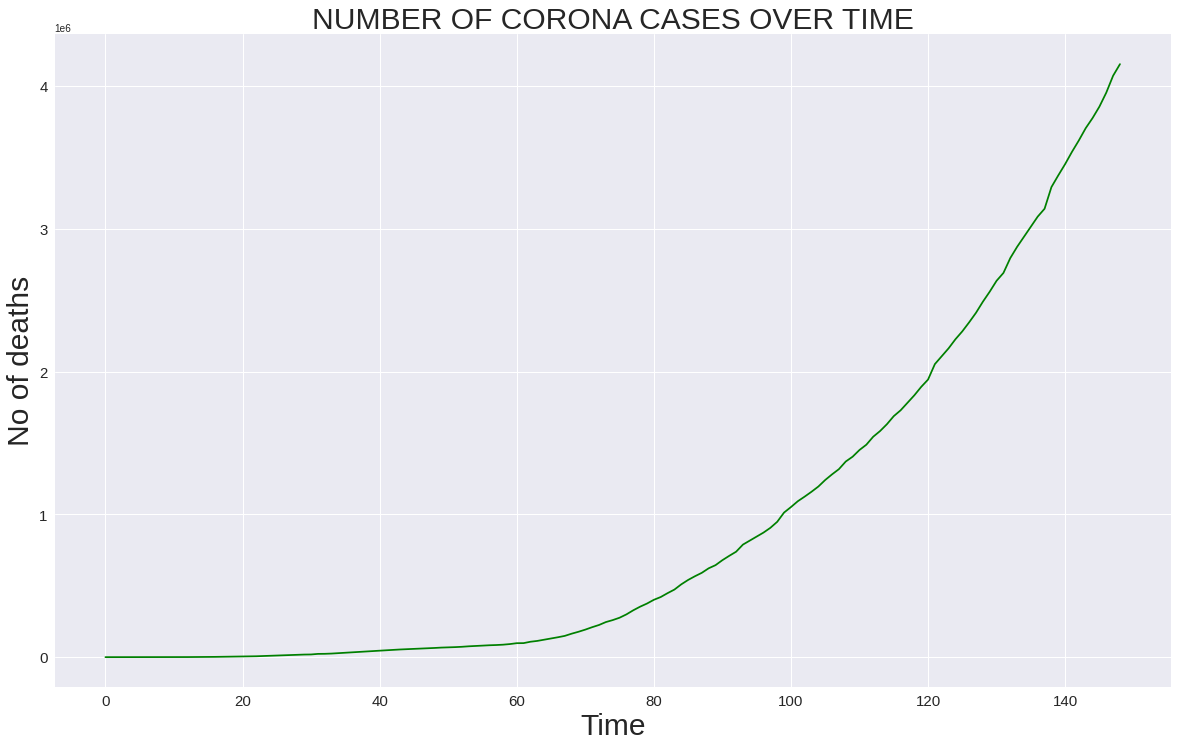

In [69]:
plt.figure(figsize=(20,12))
plt.plot(adjust_dates, total_recovered, color = 'green')
plt.title('NUMBER OF CORONA CASES OVER TIME', size = 30)
plt.xlabel('Time', size = 30)
plt.ylabel('No of deaths', size = 30)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

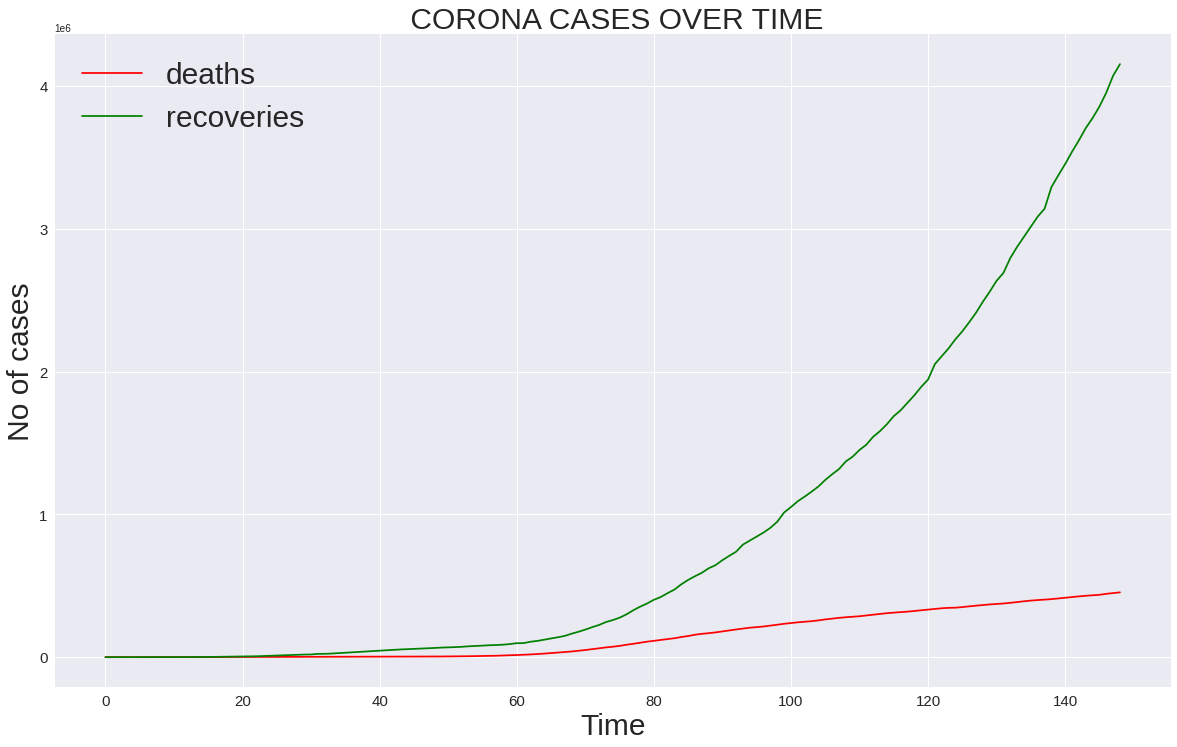

In [70]:
plt.figure(figsize=(20,12))
plt.plot(adjust_dates,total_deaths, color = 'red')
plt.plot(adjust_dates,total_recovered, color = 'green')
plt.title(' CORONA CASES OVER TIME', size = 30)
plt.xlabel('Time', size = 30)
plt.ylabel('No of cases', size = 30)
plt.legend(['deaths','recoveries'], loc='best', fontsize=30)

plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

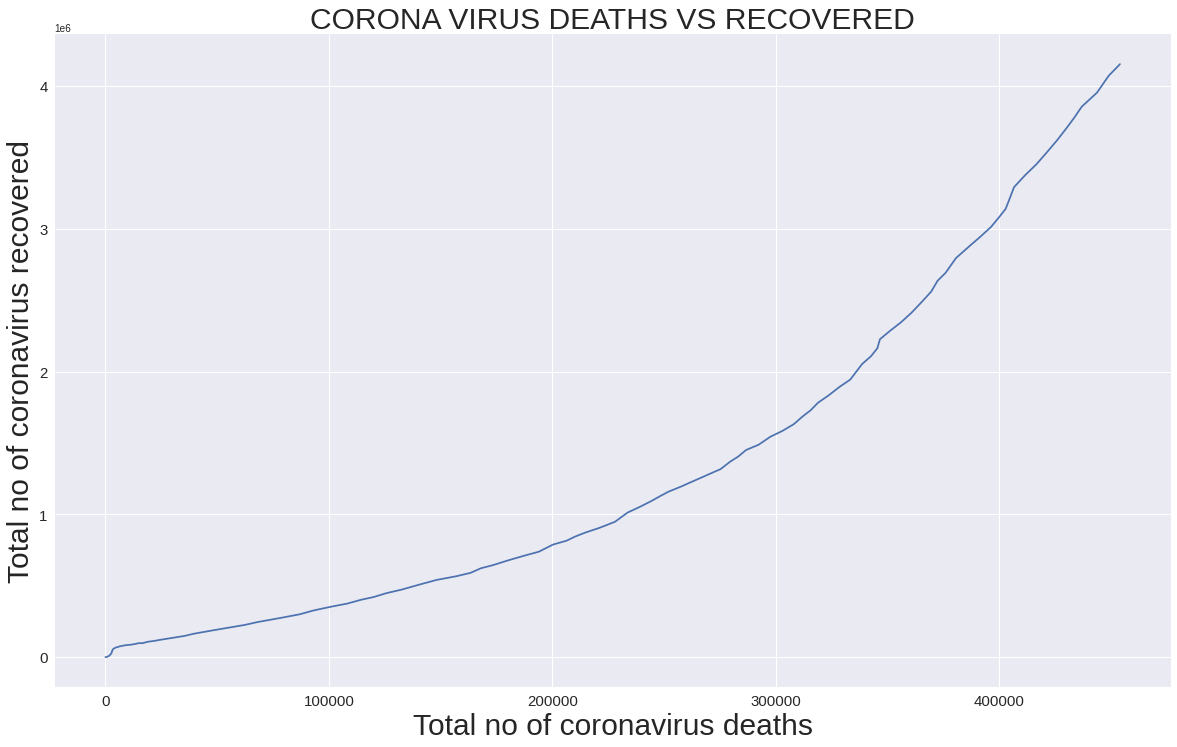

In [71]:
plt.figure(figsize=(20,12))
plt.plot(total_deaths, total_recovered)
plt.title('CORONA VIRUS DEATHS VS RECOVERED', size = 30)
plt.xlabel('Total no of coronavirus deaths', size = 30)
plt.ylabel('Total no of coronavirus recovered', size = 30)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()